# Get started with Fire Opal on IBM Quantum
**Run your first quantum circuit on a real IBM quantum device**

You're ready to use a quantum computer and you'd like to use Fire Opal to submit a program.

In this tutorial, you'll run a quantum program consisting of a single Bernstein–Vazirani circuit using the Fire Opal Python package. This guide provides the quantum circuit, so all you will need to do is set up your IBM account and bring your IBM and Q-CTRL credentials.

## Requirements
- An [IBM Quantum account](https://quantum.cloud.ibm.com/)
- A Q-CTRL account for [Fire Opal](https://q-ctrl.com/fire-opal)
- The latest version of the [Fire Opal Python package](https://docs.q-ctrl.com/fire-opal/discover/start-using/how-to-set-up-and-install-fire-opal)
- Familiarity with running Jupyter notebooks and Python environments
- Internet access

## Step 1: Import required libraries

In [1]:
import fireopal as fo
import qiskit
from qiskit_ibm_runtime import QiskitRuntimeService
import matplotlib.pyplot as plt
import qctrlvisualizer as qv

If you experience an error while attempting to import the above libraries, please run the following command using the terminal. Please note that after installing new packages, you will need to restart your notebook session or kernel for the newly installed packages to be recognized.

In [ ]:
%pip install fire-opal matplotlib qiskit-ibm-runtime qctrl-visualizer qiskit==1.4.2

## Step 2: Declare the quantum program that will be run

Below we have pre-defined a 20-qubit Bernstein–Vazirani circuit in the [OpenQASM](https://openqasm.com/) string format. The OpenQasm format may be generated by exporting a quantum circuit written with any quantum-specific Python library, such as qiskit.

In [ ]:
shot_count = 2048
hidden_bitstring = "1111111111111111111"

circuit_qasm = """
OPENQASM 2.0;
include "qelib1.inc";
qreg q[20];
creg c[19];
x q[19];
h q[0];
h q[1];
h q[2];
h q[3];
h q[4];
h q[5];
h q[6];
h q[7];
h q[8];
h q[9];
h q[10];
h q[11];
h q[12];
h q[13];
h q[14];
h q[15];
h q[16];
h q[17];
h q[18];
h q[19];
cx q[0],q[19];
cx q[1],q[19];
cx q[2],q[19];
cx q[3],q[19];
cx q[4],q[19];
cx q[5],q[19];
cx q[6],q[19];
cx q[7],q[19];
cx q[8],q[19];
cx q[9],q[19];
cx q[10],q[19];
cx q[11],q[19];
cx q[12],q[19];
cx q[13],q[19];
cx q[14],q[19];
cx q[15],q[19];
cx q[16],q[19];
cx q[17],q[19];
cx q[18],q[19];
barrier q[0],q[1],q[2],q[3],q[4],q[5],q[6],q[7],q[8],q[9],q[10],q[11],q[12],q[13],q[14],q[15],q[16],q[17],q[18],q[19];
h q[0];
h q[1];
h q[2];
h q[3];
h q[4];
h q[5];
h q[6];
h q[7];
h q[8];
h q[9];
h q[10];
h q[11];
h q[12];
h q[13];
h q[14];
h q[15];
h q[16];
h q[17];
h q[18];
h q[19];
barrier q[0],q[1],q[2],q[3],q[4],q[5],q[6],q[7],q[8],q[9],q[10],q[11],q[12],q[13],q[14],q[15],q[16],q[17],q[18],q[19];
measure q[0] -> c[0];
measure q[1] -> c[1];
measure q[2] -> c[2];
measure q[3] -> c[3];
measure q[4] -> c[4];
measure q[5] -> c[5];
measure q[6] -> c[6];
measure q[7] -> c[7];
measure q[8] -> c[8];
measure q[9] -> c[9];
measure q[10] -> c[10];
measure q[11] -> c[11];
measure q[12] -> c[12];
measure q[13] -> c[13];
measure q[14] -> c[14];
measure q[15] -> c[15];
measure q[16] -> c[16];
measure q[17] -> c[17];
measure q[18] -> c[18];"""

This quantum circuit was selected for this tutorial because the results of running it can be understood in simple terms. If the quantum computer was entirely error-free, the `hidden_bitstring` defined above would be read out 100% of the time. Later in this tutorial, we will visualize how often the hidden all `1`s bitstring is measured as a percentage of the number of total measurements, or `shot_count`.

### Step 2.1: Visualize the quantum circuit

For your convenience, you may visualize the quantum circuit using the `draw_circuit` function provided below.

In [3]:
def draw_circuit(qasm_str: str):
    """Draws a QASM circuit."""
    circuit = qiskit.QuantumCircuit.from_qasm_str(qasm_str)
    display(circuit.draw(fold=-1))


draw_circuit(circuit_qasm)

┌───┐                                                                                                     ░ ┌───┐ ░ ┌─┐                                                      
 q_0: ┤ H ├───────■─────────────────────────────────────────────────────────────────────────────────────────────░─┤ H ├─░─┤M├──────────────────────────────────────────────────────
      ├───┤       │                                                                                             ░ ├───┤ ░ └╥┘┌─┐                                                   
 q_1: ┤ H ├───────┼────■────────────────────────────────────────────────────────────────────────────────────────░─┤ H ├─░──╫─┤M├───────────────────────────────────────────────────
      ├───┤       │    │                                                                                        ░ ├───┤ ░  ║ └╥┘┌─┐                                                
 q_2: ┤ H ├───────┼────┼────■───────────────────────────────────────────────────────────────────────────────────░─┤ H ├─░──╫──╫─┤M├────────────────────────────────────────────────
      ├───┤       │    │    │                                                                                   ░ ├───┤ ░  ║  ║ └╥┘┌─┐                                             
 q_3: ┤ H ├───────┼────┼────┼────■──────────────────────────────────────────────────────────────────────────────░─┤ H ├─░──╫──╫──╫─┤M├─────────────────────────────────────────────
      ├───┤       │    │    │    │                                                                              ░ ├───┤ ░  ║  ║  ║ └╥┘┌─┐                                          
 q_4: ┤ H ├───────┼────┼────┼────┼────■─────────────────────────────────────────────────────────────────────────░─┤ H ├─░──╫──╫──╫──╫─┤M├──────────────────────────────────────────
      ├───┤       │    │    │    │    │                                                                         ░ ├───┤ ░  ║  ║  ║  ║ └╥┘┌─┐                                       
 q_5: ┤ H ├───────┼────┼────┼────┼────┼────■────────────────────────────────────────────────────────────────────░─┤ H ├─░──╫──╫──╫──╫──╫─┤M├───────────────────────────────────────
      ├───┤       │    │    │    │    │    │                                                                    ░ ├───┤ ░  ║  ║  ║  ║  ║ └╥┘┌─┐                                    
 q_6: ┤ H ├───────┼────┼────┼────┼────┼────┼────■───────────────────────────────────────────────────────────────░─┤ H ├─░──╫──╫──╫──╫──╫──╫─┤M├────────────────────────────────────
      ├───┤       │    │    │    │    │    │    │                                                               ░ ├───┤ ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐                                 
 q_7: ┤ H ├───────┼────┼────┼────┼────┼────┼────┼────■──────────────────────────────────────────────────────────░─┤ H ├─░──╫──╫──╫──╫──╫──╫──╫─┤M├─────────────────────────────────
      ├───┤       │    │    │    │    │    │    │    │                                                          ░ ├───┤ ░  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐                              
 q_8: ┤ H ├───────┼────┼────┼────┼────┼────┼────┼────┼────■─────────────────────────────────────────────────────░─┤ H ├─░──╫──╫──╫──╫──╫──╫──╫──╫─┤M├──────────────────────────────
      ├───┤       │    │    │    │    │    │    │    │    │                                                     ░ ├───┤ ░  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐                           
 q_9: ┤ H ├───────┼────┼────┼────┼────┼────┼────┼────┼────┼────■────────────────────────────────────────────────░─┤ H ├─░──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├───────────────────────────
      ├───┤       │    │    │    │    │    │    │    │    │    │                                                ░ ├───┤ ░  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐                        
q_10: ┤ H ├───────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────■───────────────────────────────────────────░─┤ H ├─░──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├────────────────────────
      ├───┤       │    │    │    │    │    │  

As you can see here, the circuit utilizes qubits numbered 0 to 19, and due to the nature of the Bernstein–Vazirani program, 19 qubits are measured, resulting in bitstring outputs of length 19.

## Step 3: Input your IBM credentials

This step sets up a `credentials` object which allows Fire Opal to utilize your IBM account on your behalf for running quantum programs as well as checking information such as which supported devices you have access to. To set this up, you'll have to find your IBM credentials on their website and input them in the cell that follows.

### Step 3.1: Find your IBM Quantum Platform credentials

IBM Quantum Platform recently migrated to be hosted on IBM Cloud. Access to their quantum devices is now organized through IBM Cloud instances - virtual servers that manage your workload execution. IBM Quantum Platform also uses an API token for account security purposes, to ensure you are the one requesting to run programs on your account. To set up your IBM Cloud instance and obtain your API token and the instance's Cloud Resource Name (CRN), see the [Onboarding guide for the new IBM Quantum Platform](https://quantum.cloud.ibm.com/docs/en/migration-guides/classic-iqp-to-cloud-iqp#onboard).



### Step 3.2: Define your IBM Quantum credentials in code

Next, you will want to create `credentials` which will enable you to submit jobs to IBM using the Fire Opal Python package.

### Step 3.2.1: Authenticate your Q-CTRL account using an API key

Because Fire Opal requires an account, you must first authenticate with Fire Opal. When using a web based environment such as Google Colab, you’ll have to authenticate with an API key. You may follow the instructions to [authenticate using an API key](https://docs.q-ctrl.com/fire-opal/discover/start-using/how-to-set-up-and-install-fire-opal), or briefly, you can do so by navigating to your [Q-CTRL account](https://accounts.q-ctrl.com/security?organization=), locating your API key, pasting it below and running the following cell.

In [ ]:
fo.authenticate_qctrl_account(api_key="Your Q-CTRL API Key")

### Step 3.2.2: (Alternative) Authenticate your Q-CTRL account from a web browser

If you are using a local development environment, the above step may be skipped in favor of authenticating with a web browser. Upon your first time calling the Fire Opal package, you'll have a web browser pop up prompting you to sign in. If you are part of multiple Q-CTRL organizations, please refer to our guide on [Setting up your Q-CTRL account](https://docs.q-ctrl.com/fire-opal/discover/start-using/how-to-set-up-and-install-fire-opal) to configure your organization. If you would like to use this method, please proceed to the following cells.

Now that you have authenticated your Q-CTRL account, run the following cell to create `credentials`. 

In [ ]:
token = "YOUR_IBM_CLOUD_API_KEY"
instance = "YOUR_IBM_CRN"

credentials = fo.credentials.make_credentials_for_ibm_cloud(
    token=token, instance=instance
)

Now you have `credentials` which will allow you to see which quantum devices you have access to as well as run your quantum program.

## Step 4: Select the IBM quantum device

There are several ways to determine which IBM quantum device you have access to. Fire Opal provides a programmatic way to obtain this information with the the function `show_supported_devices`. We highly recommend using this as it cross-compares the devices you have access to with those supported by Fire Opal. In order to use this function, you'll need your IBM Quantum API key, hub, group, and project. As another way to check the devices you have access to, you may go to https://quantum.cloud.ibm.com/instances, and look for quantum devices that are unlocked for your account.

In [ ]:
supported_devices = fo.show_supported_devices(credentials=credentials)[
    "supported_devices"
]

for name in supported_devices:
    print(name)

## Step 5: Submit the quantum program to run

When you are ready to select one of the devices above, copy and paste the device's name below to set the `backend_name`. Then, run the following cell to submit the circuit defined in Step 2 to run on that device.

In [ ]:
backend_name = "PASTE_NAME_FROM_PREVIOUS_STEP"  # Run Step 4 to obtain device names

fire_opal_job = fo.execute(
    circuits=[circuit_qasm],
    shot_count=shot_count,
    credentials=credentials,
    backend_name=backend_name,
)

### Step 5.1: Retrieve the results

Running a quantum program may take anywhere between a few seconds to potentially hours, depending on the device's job queue. Devices in high demand typically have long wait times. Because of this, Fire Opal is built such that the `execute` function will not block your program waiting for a result. Instead, you can ask Fire Opal to poll for the result and wait using the `.result()` command shown here,

In [8]:
fire_opal_result = fire_opal_job.result()

Depending on the device queue times and the progress of your job, this cell may finish quickly or have to wait for a result. The status of your job may also be viewed on IBM Quantum, under [Workloads](https://quantum.cloud.ibm.com/workloads?user=me).

### Optional: Retrieve the results later

If you run a job and then close out of your notebook session, you may retrieve the job results later using the Fire Opal activity monitor and the `get_result` function. For more information, please see [How to view previous jobs and retrieve results](https://docs.q-ctrl.com/fire-opal/execute/submit-jobs/how-to-view-previous-jobs-and-retrieve-results).

## Step 6: Understand the results

Running a quantum circuit results in a collection of bitstrings and how often each was measured. This is best understood by plotting a histogram relating bitstrings to their frequency of occurrence. The following cell provides a few helpful plotting functions and then plots the results from above.

Success probability: 21.66%


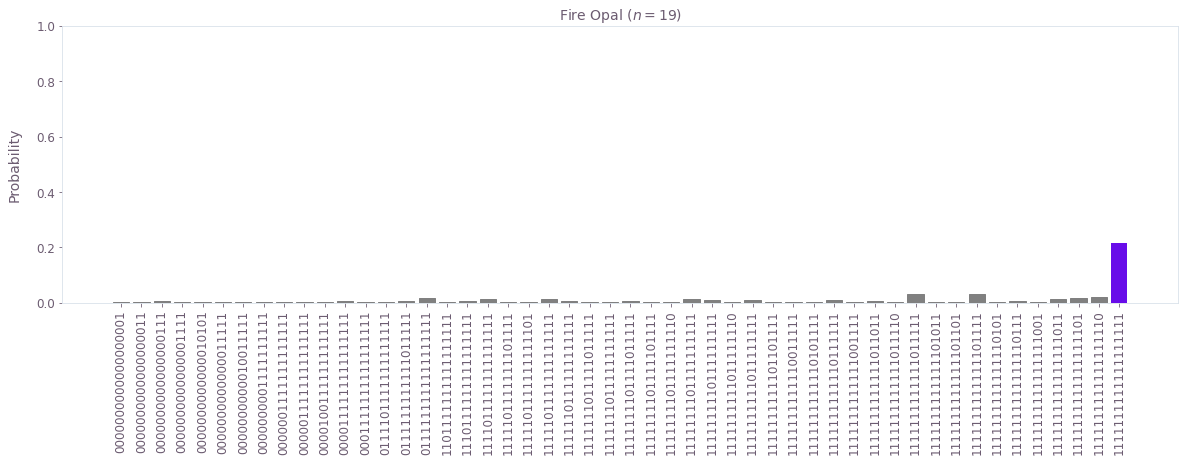

In [ ]:
plt.style.use(qv.get_qctrl_style())


def plot_bv_results(results, hidden_bitstring, title, max_columns=None):
    """Plot a probability histogram and highlight the hidden bitstring."""
    # Restrict the number of columns displayed.
    if max_columns is not None:
        top_strings = sorted(results.keys(), key=lambda x: results[x], reverse=True)[
            :max_columns
        ]
        if hidden_bitstring not in top_strings:
            top_strings.append(hidden_bitstring)
        results = {s: results.get(s, 0) for s in top_strings}

    bitstrings = sorted(results.keys())

    def to_probability(value, total):
        if isinstance(value, float):
            return value
        return value / total

    probabilities = [to_probability(results[b], shot_count) for b in bitstrings]
    plt.figure(figsize=(20, 5))
    bars = plt.bar(bitstrings, probabilities)
    plt.xticks(rotation=90)

    for index, bitstring in enumerate(bitstrings):
        if bitstring != hidden_bitstring:
            bars[index].set_color("grey")

    plt.ylabel("Probability")
    plt.ylim([0, 1])
    plt.title(title)
    plt.show()


def bitstring_count_to_probabilities(data, shot_count, number_of_counting_qubits):
    """
    Convert bitstring counts to probabilities.
    """
    probabilities = {
        format(int(bitstring, 2), f"0{number_of_counting_qubits}b"): (
            bitstring_count / shot_count
        )
        for bitstring, bitstring_count in data.items()
    }
    return probabilities


fire_opal_results = fire_opal_result["results"]
if hidden_bitstring not in fire_opal_results[0]:
    print("The hidden_bitstring has 0% probability.")
else:
    print(
        f"Success probability: {100 * fire_opal_results[0].get(hidden_bitstring, 0):.2f}%"
    )

plot_bv_results(
    fire_opal_results[0],
    hidden_bitstring=hidden_bitstring,
    title="Fire Opal ($n=19$)",
    max_columns=50,
)

Congratulations! 🔥 You have now successfully run a quantum program consisting of a 20 qubit Bernstein–Vazirani circuit.

## Optional: Compare Fire Opal to Qiskit

If you are seeking a comparison, you may run the same program using Qiskit, without realizing the error suppression benefits Fire Opal includes. The code below uses Qiskit on the same IBM backend as previously to obtain this one-to-one comparison. Note that this job too is subject to the device queue and therefore may take anywhere from seconds to potentially hours.

In [ ]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

service = QiskitRuntimeService(
    token=token, instance=instance, channel="ibm_quantum_platform"
)
backend = service.backend(backend_name)
sampler = Sampler(backend)

circuit_qiskit = qiskit.QuantumCircuit.from_qasm_str(circuit_qasm)
pass_manager = generate_preset_pass_manager(backend=backend)
isa_circuit = pass_manager.run(circuit_qiskit)
ibm_result = sampler.run([isa_circuit], shots=shot_count).result()
ibm_probabilities = bitstring_count_to_probabilities(
    ibm_result[0].data.c.get_counts(), shot_count, 19
)

The hidden_bitstring has 0% probability.


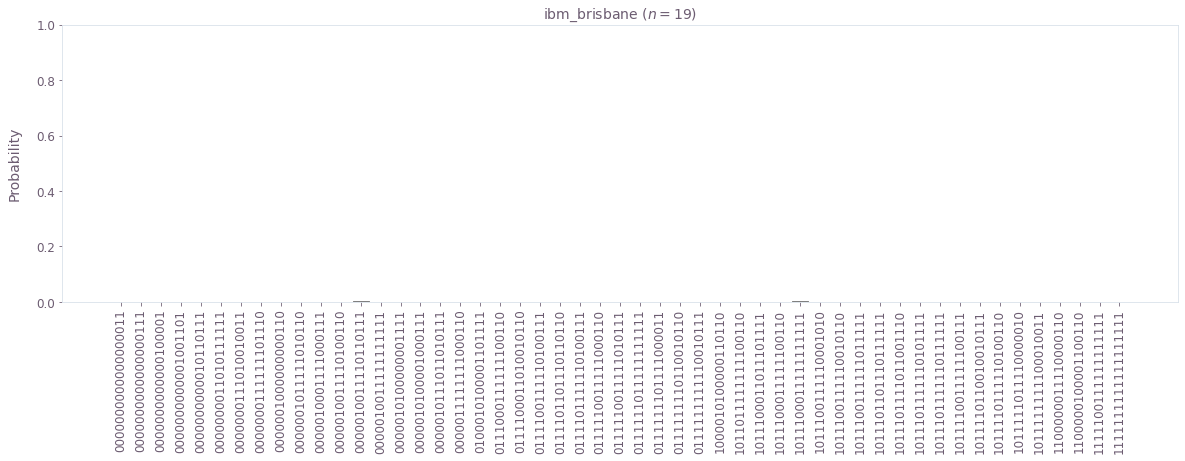

In [ ]:
if hidden_bitstring not in ibm_probabilities:
    print("The hidden_bitstring has 0% probability.")
else:
    print(
        f"Success probability: {100 * ibm_probabilities.get(hidden_bitstring, 0):.2f}%"
    )
plot_bv_results(
    ibm_probabilities,
    hidden_bitstring=hidden_bitstring,
    title=f"{backend_name} ($n=19$)",
    max_columns=50,
)

You may now compare this bitstring histogram and success probability to the previous one obtained when using Fire Opal.

## Show packages used to run this notebook

The package versions below were used to produce this notebook.

In [13]:
from fireopal import print_package_versions

print_package_versions()

| Package               | Version |
| --------------------- | ------- |
| Python                | 3.11.10 |
| matplotlib            | 3.10.1  |
| networkx              | 2.8.8   |
| numpy                 | 1.26.4  |
| qiskit                | 1.4.2   |
| qiskit-ibm-runtime    | 0.37.0  |
| sympy                 | 1.13.3  |
| fire-opal             | 8.4.1   |
| qctrl-visualizer      | 8.0.2   |
| qctrl-workflow-client | 5.4.0   |
